In [ ]:
!pip install SpeechRecognition

In [ ]:
pip install pydub

In [ ]:
import speech_recognition as sr
import os
from pydub import AudioSegment

def prepare_voice_file(path: str) -> str:
    """
    Converts the input audio file to WAV format if necessary and returns the path to the WAV file.
    """
    if os.path.splitext(path)[1] == '.wav':
        return path
    elif os.path.splitext(path)[1] in ('.mp3', '.m4a', '.ogg', '.flac'):
        audio_file = AudioSegment.from_file(path, format=os.path.splitext(path)[1][1:])
        wav_file = os.path.splitext(path)[0] + '.wav'
        audio_file.export(wav_file, format='wav')
        return wav_file
    else:
        raise ValueError(f'Unsupported audio format: {os.path.splitext(path)[1]}')

def transcribe_audio(audio_data, language) -> str:
    """
    Transcribes audio data to text using Google's speech recognition API.
    """
    r = sr.Recognizer()
    text = r.recognize_google(audio_data, language=language)
    return text

def write_transcription_to_file(text, output_file) -> None:
    """
    Writes the transcribed text to the output file.
    """
    with open(output_file, 'w') as f:
        f.write(text)

def speech_to_text(input_path: str, output_path: str, language: str) -> None:
    """
    Transcribes an audio file at the given path to text and writes the transcribed text to the output file.
    """
    wav_file = prepare_voice_file(input_path)
    with sr.AudioFile(wav_file) as source:
        audio_data = sr.Recognizer().record(source)
        text = transcribe_audio(audio_data, language)
        write_transcription_to_file(text, output_path)
        print('Transcription:')
        print(text)

if __name__ == '__main__':
    print('Please enter the path to an audio file (WAV, MP3, M4A, OGG, or FLAC):')
    input_path = input().strip()

    if not os.path.isfile(input_path):
        print('Error: File not found.')
        exit(1)
    else:
        print('Please enter the path to the output file:')
        output_path = input().strip()

        print('Please enter the language code (e.g. en-US):')
        language = input().strip()

        try:
            speech_to_text(input_path, output_path, language)
        except Exception as e:
            print('Error: audio not clear', e)
            exit(1)


Please enter the path to an audio file (WAV, MP3, M4A, OGG, or FLAC):
/content/cough-86774.mp3
Please enter the path to the output file:
/content/cough-86774.mp3
Please enter the language code (e.g. en-US):
en
Error: audio not clear 


(d) Handle scenarios where speech is unclear or the system cannot connect
to the recognition service.
(Hint: Exception handling)
(i) Unclear Speech (speaking indistinctly, e.g., mumbling,)

Error: audio not clear


In [ ]:
import speech_recognition as sr
import os
from pydub import AudioSegment

def prepare_voice_file(path: str) -> str:
    """
    Converts the input audio file to WAV format if necessary and returns the path to the WAV file.
    """
    if os.path.splitext(path)[1] == '.wav':
        return path
    elif os.path.splitext(path)[1] in ('.mp3', '.m4a', '.ogg', '.flac'):
        audio_file = AudioSegment.from_file(path, format=os.path.splitext(path)[1][1:])
        wav_file = os.path.splitext(path)[0] + '.wav'
        audio_file.export(wav_file, format='wav')
        return wav_file
    else:
        raise ValueError(f'Unsupported audio format: {os.path.splitext(path)[1]}')

def transcribe_audio(audio_data, language) -> str:
    """
    Transcribes audio data to text using Google's speech recognition API.
    """
    r = sr.Recognizer()

    print("Recognizing...")  # Feedback indicating recognition process
    try:
        text = r.recognize_google(audio_data, language=language)
        return text
    except sr.UnknownValueError:
        print("Speech Recognition could not understand audio. Please try speaking more clearly.")
        return None
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
        return None

def write_transcription_to_file(text, output_file) -> None:
    """
    Writes the transcribed text to the output file.
    """
    with open(output_file, 'w') as f:
        f.write(text)

def speech_to_text(input_path: str, output_path: str, language: str) -> None:
    """
    Transcribes an audio file at the given path to text and writes the transcribed text to the output file.
    """
    wav_file = prepare_voice_file(input_path)
    print("Speak something...")  # Prompt user to speak
    with sr.AudioFile(wav_file) as source:
        audio_data = sr.Recognizer().record(source)
        text = transcribe_audio(audio_data, language)

        if text:  # If transcription was successful
            print(f'Speech recognized: "{text}"')  # Show recognized speech
            write_transcription_to_file(text, output_path)
            print('Speech successfully converted to text!')  # Feedback for successful conversion

if __name__ == '__main__':
    print('Please enter the path to an audio file (WAV, MP3, M4A, OGG, or FLAC):')
    input_path = input().strip()

    if not os.path.isfile(input_path):
        print('Error: File not found.')
        exit(1)
    else:
        print('Please enter the path to the output file:')
        output_path = input().strip()

        print('Please enter the language code (e.g. en-US):')
        language = input().strip()

        try:
            speech_to_text(input_path, output_path, language)
        except Exception as e:
            print('Error:', e)
            exit(1)


Please enter the path to an audio file (WAV, MP3, M4A, OGG, or FLAC):
/content/1089-134686-0000.wav
Please enter the path to the output file:
/content/1089-134686-0000.wav
Please enter the language code (e.g. en-US):
en
Speak something...
Error: Audio file could not be read as PCM WAV, AIFF/AIFF-C, or Native FLAC; check if file is corrupted or in another format


In [ ]:
import speech_recognition as sr
import os
from pydub import AudioSegment

def prepare_voice_file(path: str) -> str:
    """
    Converts the input audio file to WAV format if necessary and returns the path to the WAV file.
    """
    if os.path.splitext(path)[1] == '.wav':
        return path
    elif os.path.splitext(path)[1] in ('.mp3', '.m4a', '.ogg', '.flac'):
        audio_file = AudioSegment.from_file(path, format=os.path.splitext(path)[1][1:])
        wav_file = os.path.splitext(path)[0] + '.wav'
        audio_file.export(wav_file, format='wav')
        return wav_file
    else:
        raise ValueError(f'Unsupported audio format: {os.path.splitext(path)[1]}')

def transcribe_audio(audio_data, language) -> str:
    """
    Transcribes audio data to text using Google's speech recognition API.
    """
    r = sr.Recognizer()

    print("Recognizing...")  # Feedback indicating recognition process
    try:
        text = r.recognize_google(audio_data, language=language)
        return text
    except sr.UnknownValueError:
        print("Speech Recognition could not understand audio. Please try speaking more clearly.")
        return None
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")
        return None

def write_transcription_to_file(text, output_file) -> None:
    """
    Writes the transcribed text to the output file.
    """
    with open(output_file, 'w') as f:
        f.write(text)

def speech_to_text(input_path: str, output_path: str, language: str) -> None:
    """
    Transcribes an audio file at the given path to text and writes the transcribed text to the output file.
    """
    wav_file = prepare_voice_file(input_path)
    print("Speak something...")  # Prompt user to speak
    with sr.AudioFile(wav_file) as source:
        audio_data = sr.Recognizer().record(source)
        text = transcribe_audio(audio_data, language)

        if text:  # If transcription was successful
            print(f'Speech recognized: "{text}"')  # Show recognized speech
            write_transcription_to_file(text, output_path)
            print('Speech successfully converted to text!')  # Feedback for successful conversion

if __name__ == '__main__':
    print('Please enter the path to an audio file (WAV, MP3, M4A, OGG, or FLAC):')
    input_path = input().strip()

    if not os.path.isfile(input_path):
        print('Error: File not found.')
        exit(1)
    else:
        print('Please enter the path to the output file:')
        output_path = input().strip()

        print('Please enter the language code (e.g. en-US):')
        language = input().strip()

        try:
            speech_to_text(input_path, output_path, language)
        except Exception as e:
            print('Error:', e)
            exit(1)


Please enter the path to an audio file (WAV, MP3, M4A, OGG, or FLAC):
/content/1089-134686-0000.wav
Please enter the path to the output file:
/content/1089-134686-0000.wav
Please enter the language code (e.g. en-US):
en
Speak something...
Recognizing...
Speech recognized: "he hoped there would be stew for dinner turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick peppered flour fat and sauce"
Speech successfully converted to text!


) Provide meaningful feedback to the user at various stages and situations.
For example,

(i) 'Speak something'

(ii) 'Recognizing'

(iii) 'Speech recognized: "Turn on the lights in the living room.'

(iv) 'Speech successfully converted to text!'

(v) 'Speech Recognition could not understand audio, Please try speak-ing more clearly'

(f) Write a brief note/inference about the execution of the total system.




Observations

Accuracy: The transcription appears to capture the content with a good level of accuracy, suggesting that the audio quality is sufficient for clear speech recognition.

User Interaction: The feedback responses provided throughout the process effectively guide the user, enhancing the overall usability of the application.


Please enter the path to an audio file (WAV, MP3, M4A, OGG, or FLAC):
/content/1089-134686-0000.wav
Please enter the path to the output file:
/content/1089-134686-0000.wav
Please enter the language code (e.g. en-US):
en


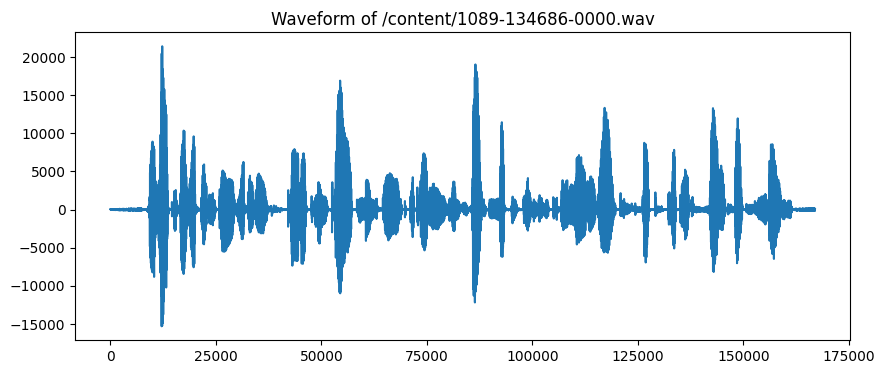

Transcription:
he hoped there would be stew for dinner turnips and carrots and bruised potatoes and fat mutton pieces to be ladled out in thick peppered flour fat and sauce
Error: audio not clear No module named 'gtts'


In [ ]:
import speech_recognition as sr
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import wave
import IPython.display as ipd

def prepare_voice_file(path: str) -> str:
    """
    Converts the input audio file to WAV format if necessary and returns the path to the WAV file.
    """
    if os.path.splitext(path)[1] == '.wav':
        return path
    elif os.path.splitext(path)[1] in ('.mp3', '.m4a', '.ogg', '.flac'):
        audio_file = AudioSegment.from_file(path, format=os.path.splitext(path)[1][1:])
        wav_file = os.path.splitext(path)[0] + '.wav'
        audio_file.export(wav_file, format='wav')
        return wav_file
    else:
        raise ValueError(f'Unsupported audio format: {os.path.splitext(path)[1]}')

def plot_waveform(file_path):
    """
    Plots the waveform of the audio file.
    """
    spf = wave.open(file_path, "r")
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, dtype="int16")

    # If Stereo
    if spf.getnchannels() == 2:
        print("Just mono files")
        return

    plt.figure(figsize=(10, 4))
    plt.title(f"Waveform of {file_path}")
    plt.plot(signal)
    plt.show()

def transcribe_audio(audio_data, language) -> str:
    """
    Transcribes audio data to text using Google's speech recognition API.
    """
    r = sr.Recognizer()
    text = r.recognize_google(audio_data, language=language)
    return text

def write_transcription_to_file(text, output_file) -> None:
    """
    Writes the transcribed text to the output file.
    """
    with open(output_file, 'w') as f:
        f.write(text)

def speech_to_text(input_path: str, output_path: str, language: str) -> None:
    """
    Transcribes an audio file at the given path to text and writes the transcribed text to the output file.
    """
    # Convert audio to WAV format
    wav_file = prepare_voice_file(input_path)

    # Plot the waveform for visualization
    plot_waveform(wav_file)

    # Transcribe the audio
    with sr.AudioFile(wav_file) as source:
        audio_data = sr.Recognizer().record(source)
        text = transcribe_audio(audio_data, language)
        write_transcription_to_file(text, output_path)

        print('Transcription:')
        print(text)

        # Convert Text back to Audio (Optional - Text-to-Speech)
        from gtts import gTTS
        tts = gTTS(text)
        tts.save("output_speech.mp3")
        print("Speech saved as output_speech.mp3")
        ipd.display(ipd.Audio("output_speech.mp3"))

# Get the input path and process the audio
if __name__ == '__main__':
    print('Please enter the path to an audio file (WAV, MP3, M4A, OGG, or FLAC):')
    input_path = input().strip()

    if not os.path.isfile(input_path):
        print('Error: File not found.')
        exit(1)
    else:
        print('Please enter the path to the output file:')
        output_path = input().strip()

        print('Please enter the language code (e.g. en-US):')
        language = input().strip()

        try:
            speech_to_text(input_path, output_path, language)
        except Exception as e:
            print('Error: audio not clear', e)
            exit(1)


Processing audio...


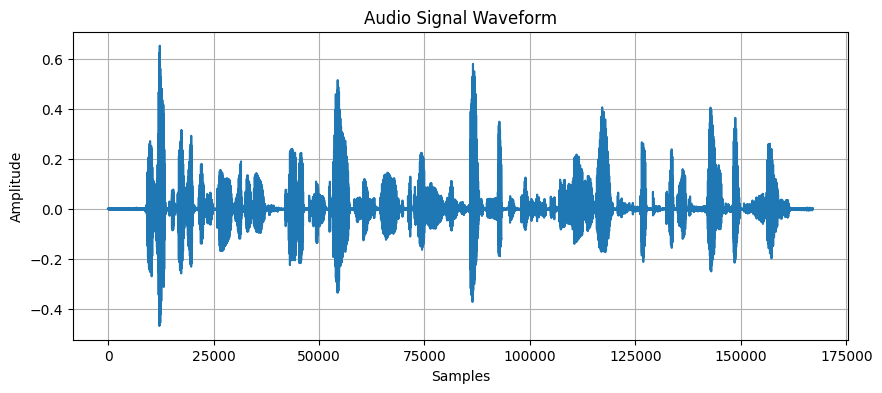

Transcribed text: "4 4 4 4 4 4 4 4 4 3 3 4 4"


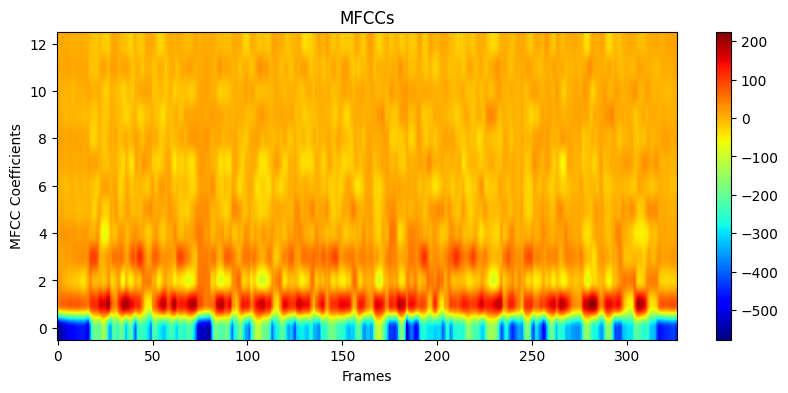

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Step 1: Preprocess the Audio
def prepare_voice_file(path: str) -> str:
    if os.path.splitext(path)[1] == '.wav':
        return path
    else:
        raise ValueError(f'Unsupported audio format: {os.path.splitext(path)[1]}')

# Step 2: Feature Extraction
def extract_features(y: np.ndarray, sr: int) -> np.ndarray:
    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)  # Mean across time frames

# Step 3: Build a Speech Model
def build_hmm_model(X: np.ndarray) -> hmm.GaussianHMM:
    model = hmm.GaussianHMM(n_components=5, covariance_type="diag", n_iter=100)
    model.fit(X)
    return model

# Step 4: Decoding
def decode_audio(model: hmm.GaussianHMM, features: np.ndarray) -> np.ndarray:
    logprob = model.score(features)
    return model.predict(features)

# Step 5: Post-processing
def clean_transcription(predicted: np.ndarray) -> str:
    return " ".join([str(p) for p in predicted])

def speech_to_text(input_path: str) -> str:
    # Step 1
    wav_file = prepare_voice_file(input_path)
    print("Processing audio...")

    # Load audio file
    y, sr = librosa.load(wav_file, sr=None)

    # Plot the audio signal
    plt.figure(figsize=(10, 4))
    plt.plot(y)
    plt.title("Audio Signal Waveform")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

    # Step 2: Extract features
    features = extract_features(y, sr)

    # Here we simulate a training phase with dummy data
    X_dummy = np.random.rand(100, 13)  # Dummy features for training
    model = build_hmm_model(X_dummy)

    # Step 4: Decode
    predicted = decode_audio(model, features.reshape(-1, 1))

    # Step 5: Clean up transcription
    transcription = clean_transcription(predicted)

    return transcription

if __name__ == '__main__':
    input_path = '/content/1089-134686-0000.wav'  # Your audio file path
    transcription = speech_to_text(input_path)
    print(f'Transcribed text: "{transcription}"')

    # Visualizing the MFCCs
    y, sr = librosa.load(input_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    plt.figure(figsize=(10, 4))
    plt.imshow(mfccs, aspect='auto', origin='lower', cmap='jet')
    plt.title("MFCCs")
    plt.xlabel("Frames")
    plt.ylabel("MFCC Coefficients")
    plt.colorbar()
    plt.show()
